### InceptionResNetV2 is already trained moedl and we are directly using that! i.e using an object of it

with this same code just changing inceptionResNet to vgg16 or alexnet we can see thier model predcitions too!

In [ ]:
#InceptionResNetV2 is originally trained on imageNet datase
#InceptionResNetV2 is combination of inception and ResNet model whoch are lately close to best in image classification

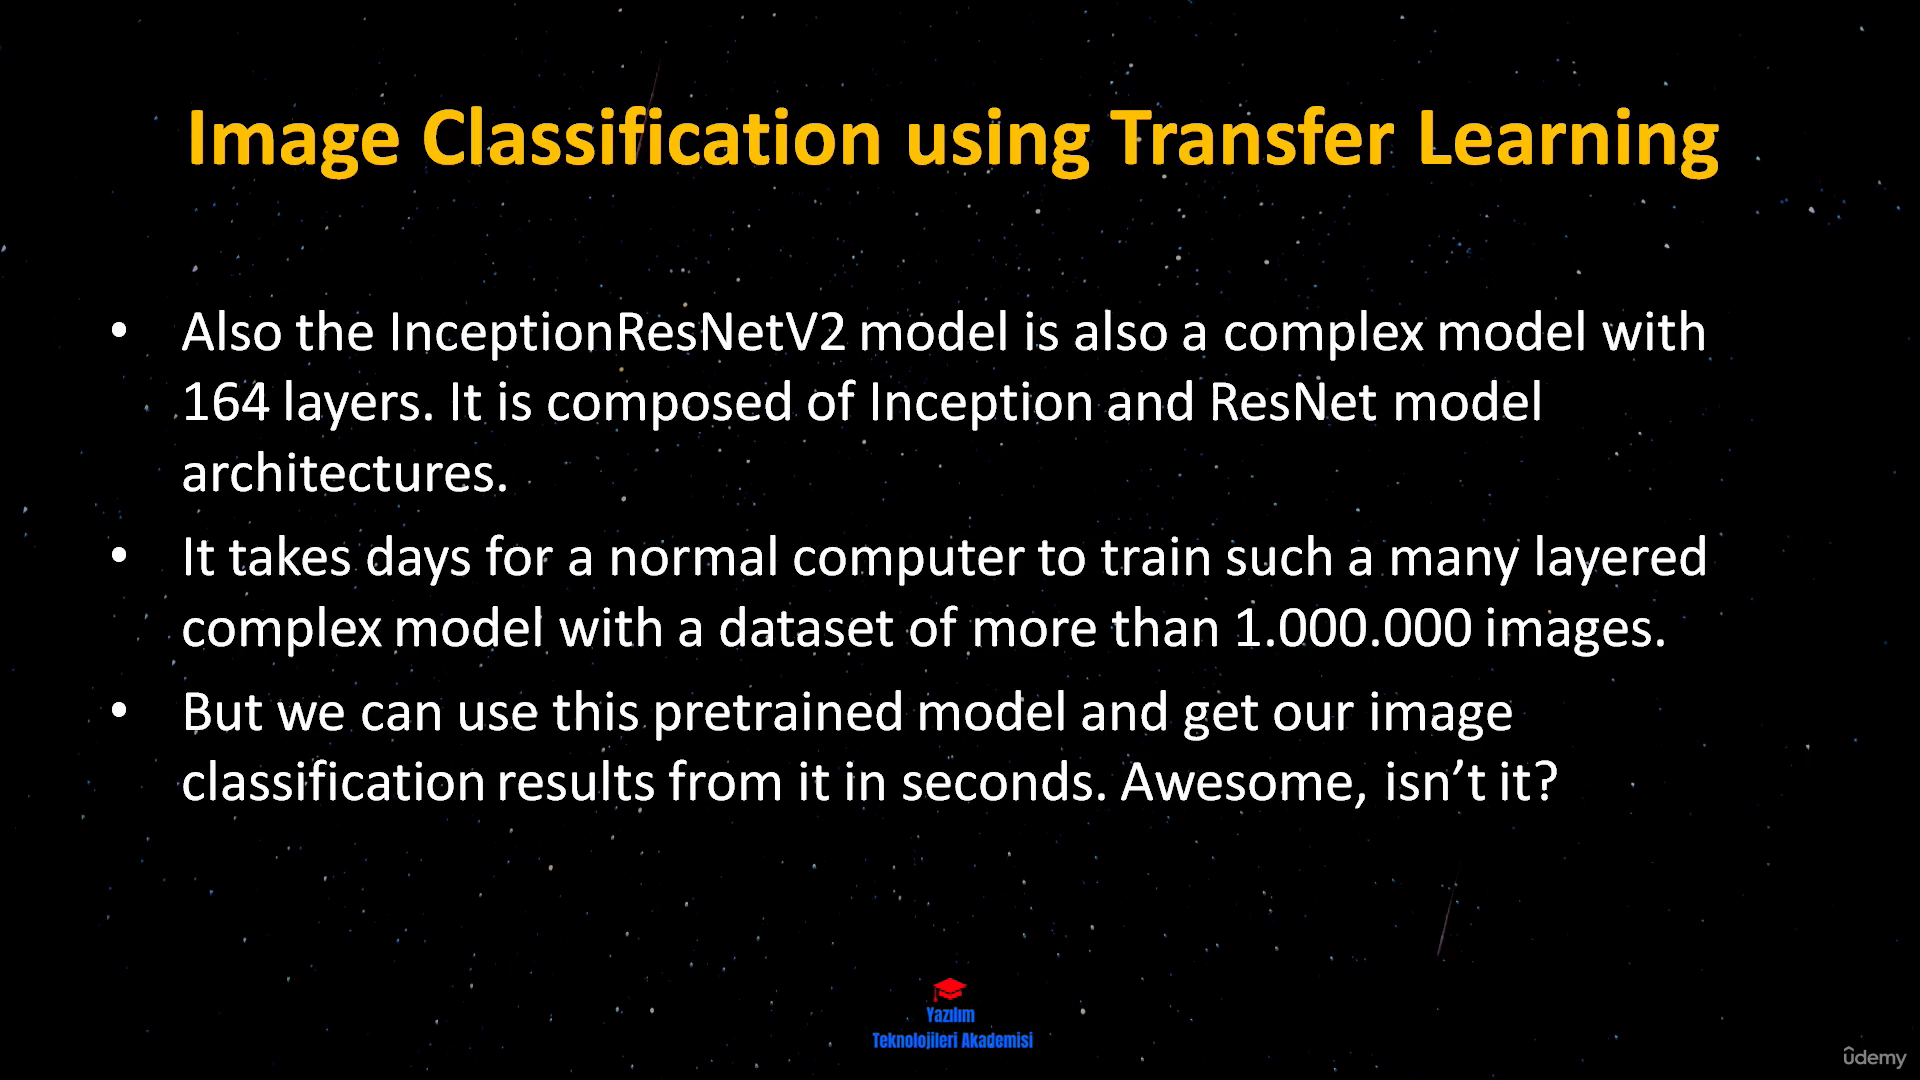

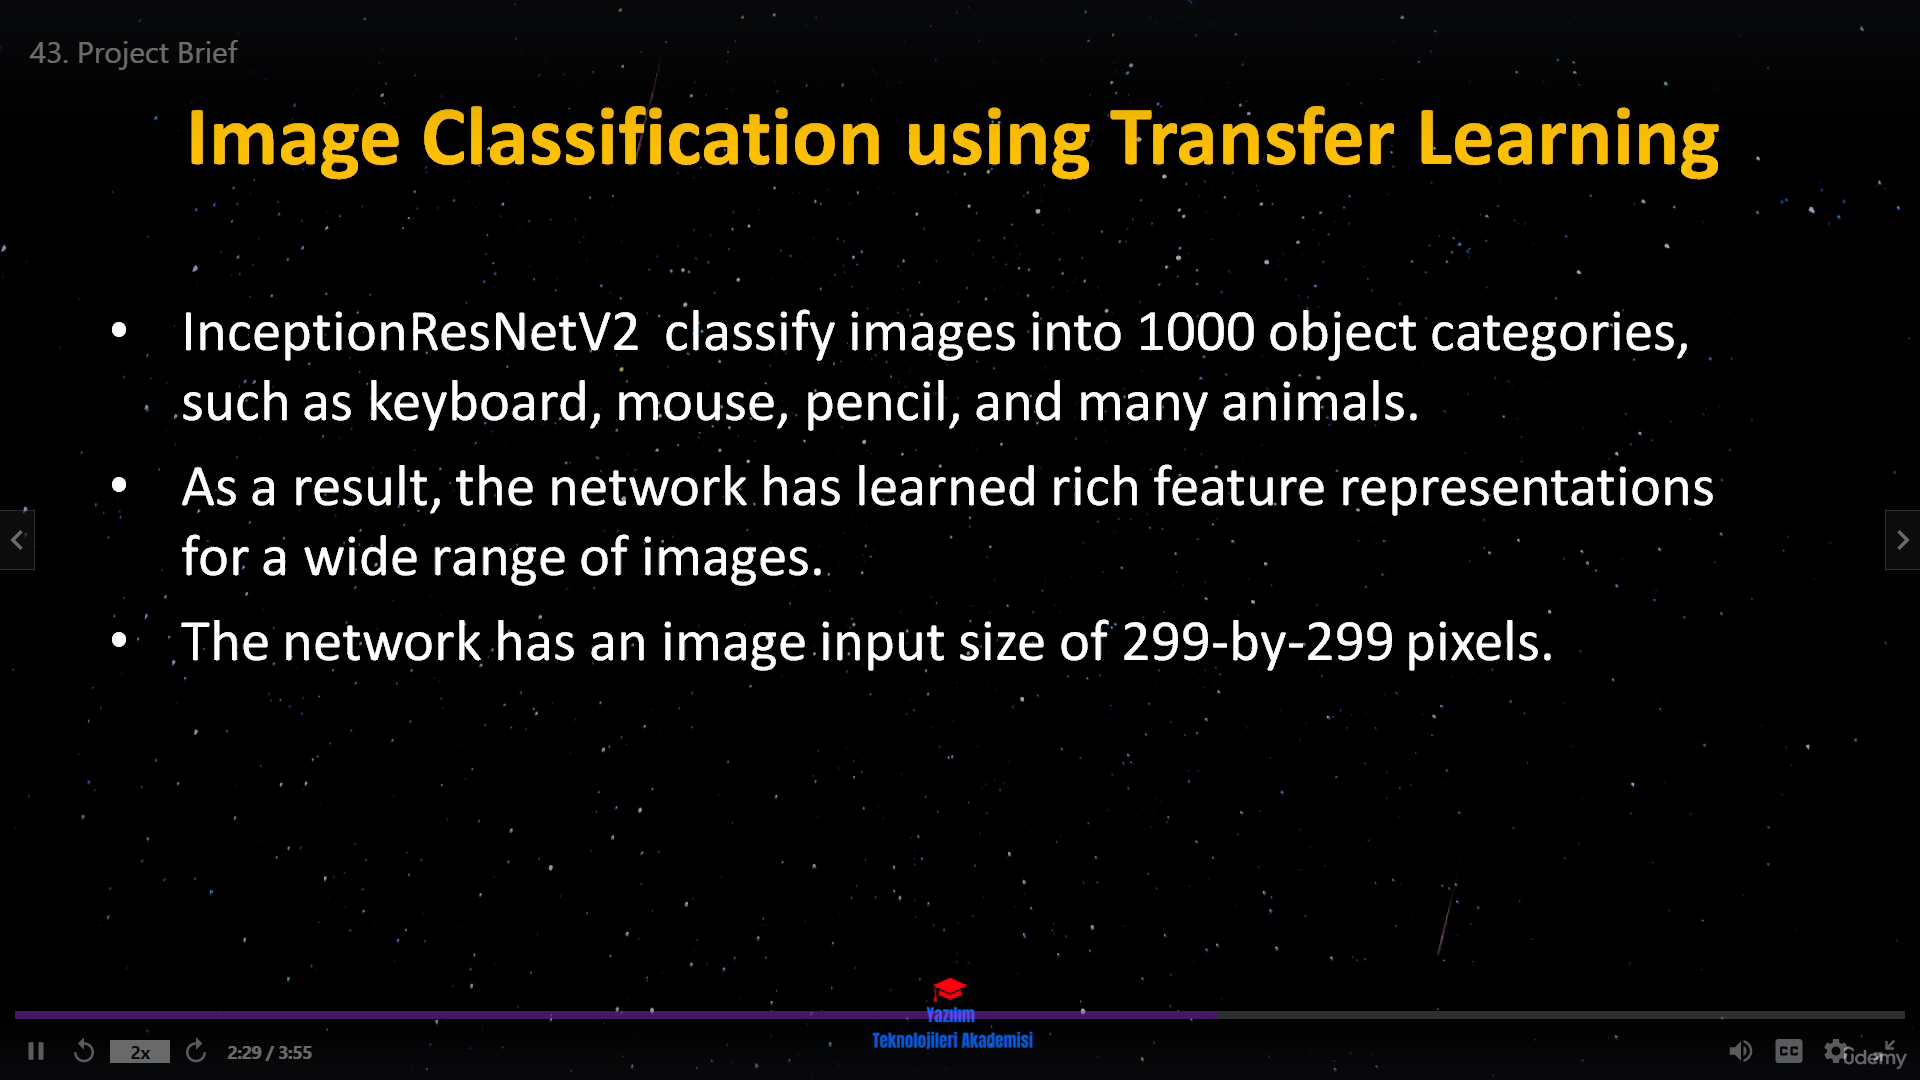

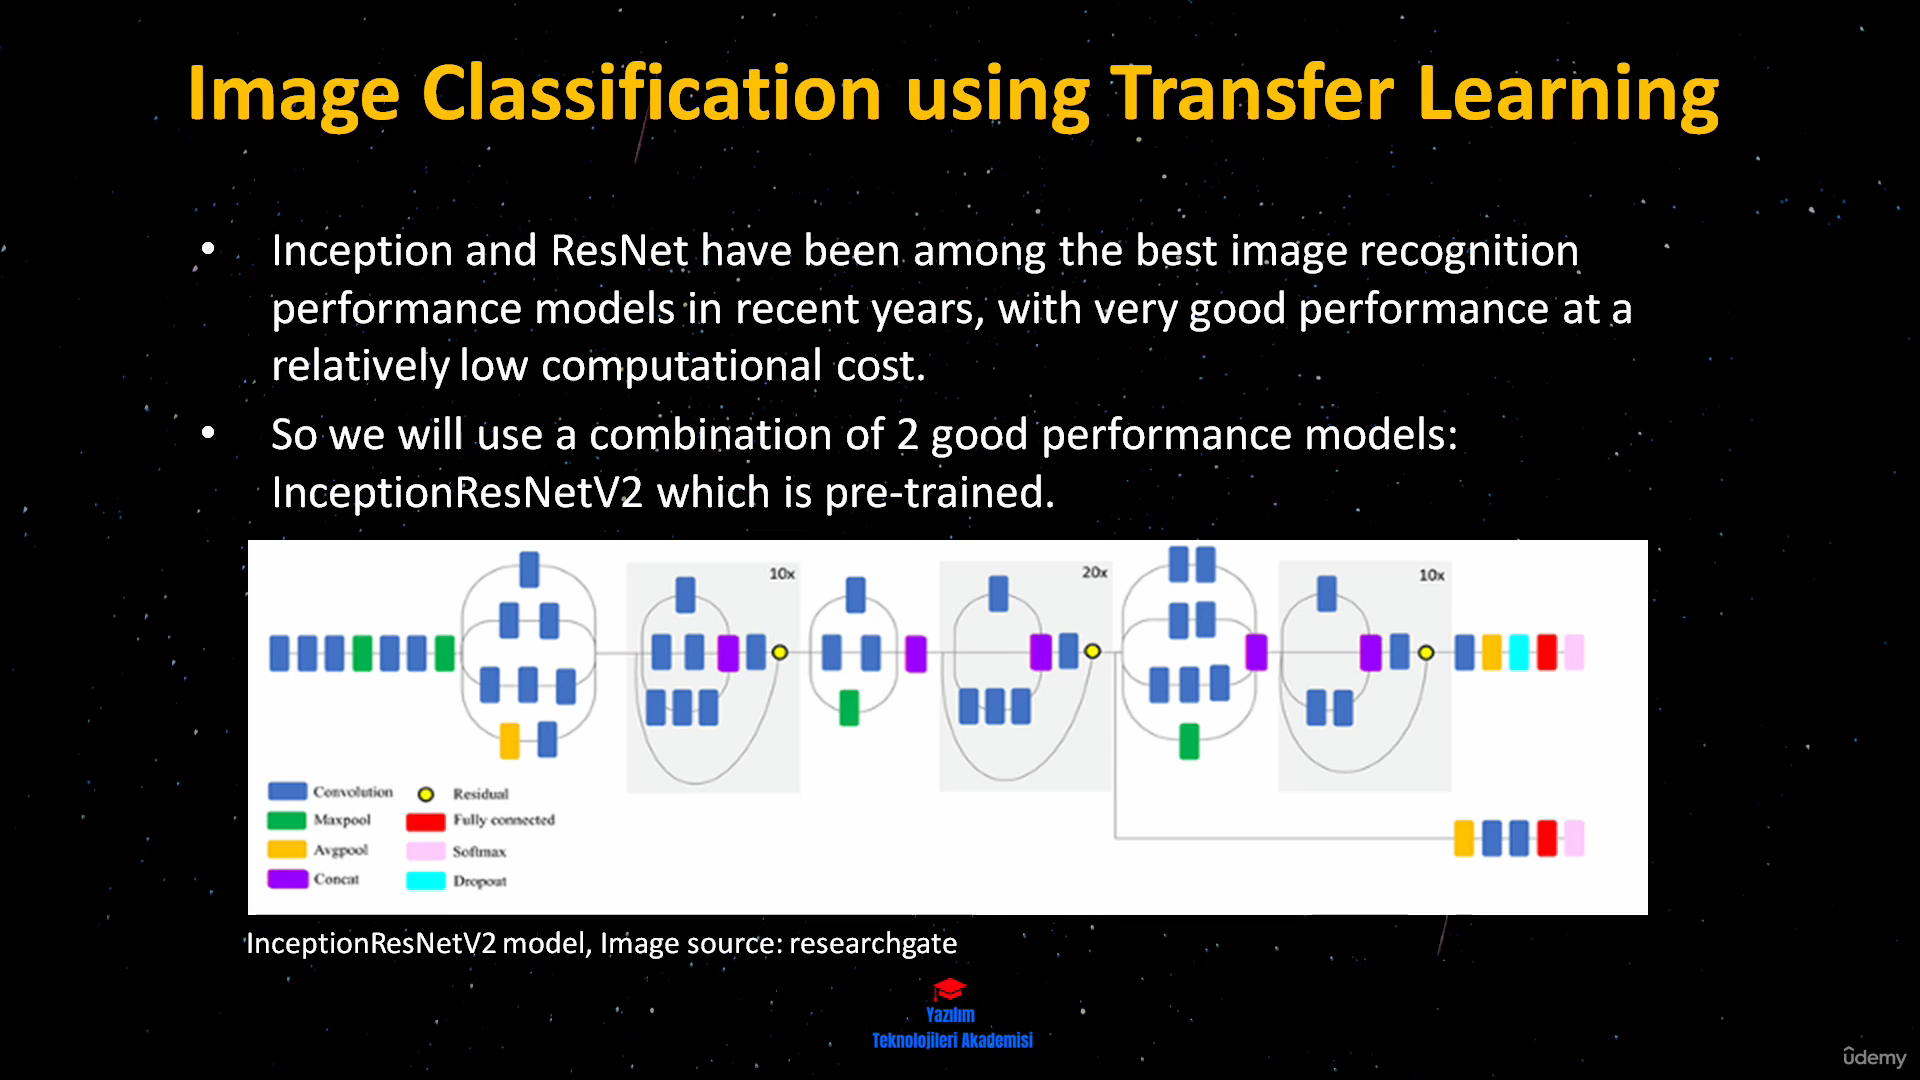

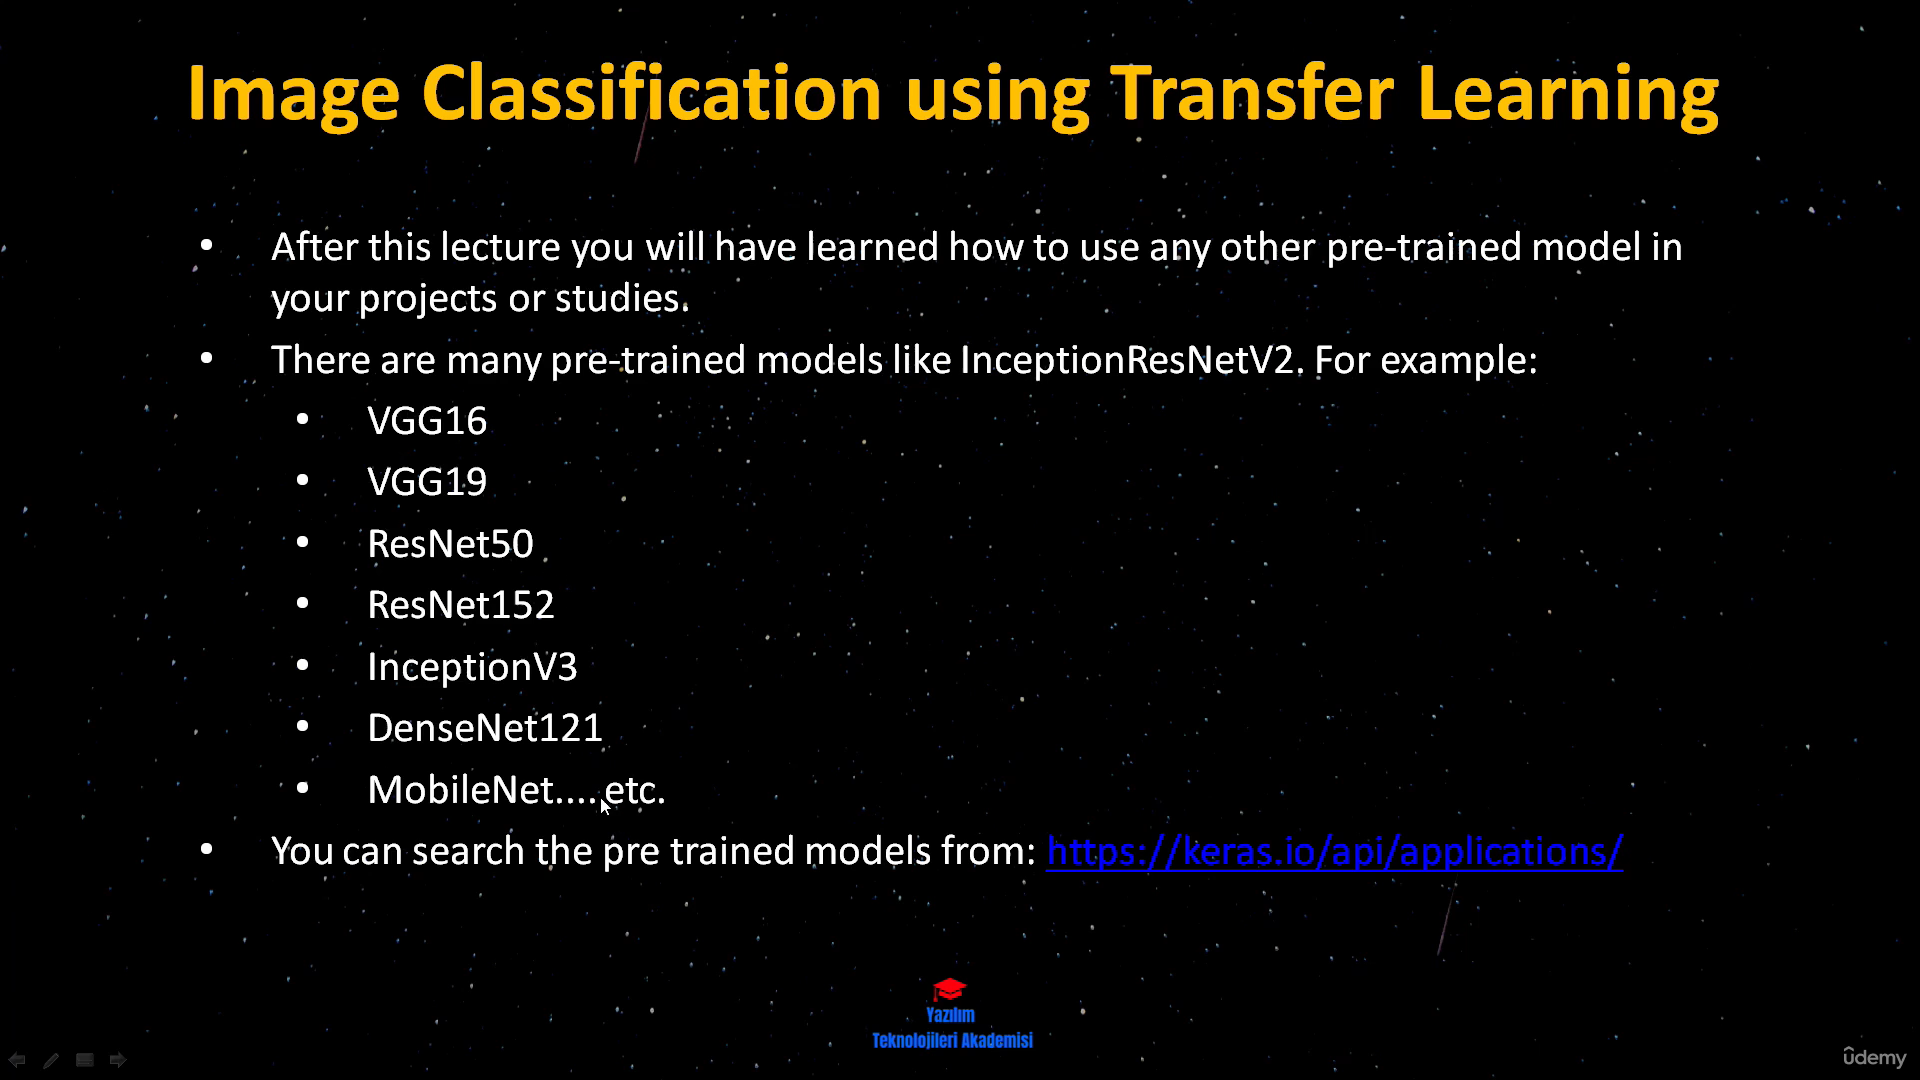

In [ ]:
import numpy as np
from PIL import Image   #for image operations like open, resize etc
from IPython.display import Image as show_image #for displaying test images
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions

In [ ]:
#InceptionResNetV2 takes input of size 299x299 resolution and classifies images into 1000 categories
#load image and make it 299x299:
#upload image
#img=Image.open("submarine.jpg").resize((299,299))
img=Image.open("truck2.jpg").resize((299,299))


#convert image to array:
img=np.array(img)

#shape:
img.shape


(299, 299, 3)

In [ ]:
#have to put extra one dimension as InceptionResNetV2 takes 4 dimension input: with reshape(-1,...) this always adds one extra dimension to array
#our model takes in 4d array:
img=img.reshape(-1,299,299,3)

In [ ]:
#scaling/Normalizing the data between 1 and -1 using preprocess_input
#required by InceptionResNetV2
img=preprocess_input(img)
img.shape, img.ndim

((1, 299, 299, 3), 4)

In [ ]:
#load model:  #creating object
model=InceptionResNetV2(weights='imagenet', classes=1000) #InceptionResNetV2 will classify images into one of 1000 possible categories
#usually it would have taken days to train this but since the model is already made and save we can use it instantly

225222656/225209952 [==============================] - 1s 0us/step


In [ ]:
#inspect out model:
#layers:
print(model.summary())
type(model)

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                               

keras.engine.functional.Functional

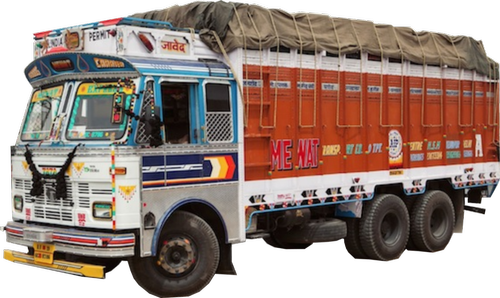

In [ ]:
#our image:
show_image(filename="truck.png")

In [ ]:
preds=model.predict(img)
print("predicted categories: ", decode_predictions(preds, top=4)[0])  #decode the results into list of tuples


predicted categories:  [('n04467665', 'trailer_truck', 0.9255572), ('n03796401', 'moving_van', 0.010766206), ('n04461696', 'tow_truck', 0.001731159), ('n03384352', 'forklift', 0.00049498316)]


In [ ]:
#!unzip/content/Pexels Videos 2252223.rar

In [ ]:
import cv2

cap=cv2.VideoCapture("/content/Pexels Videos 2252223.mp4")

if not cap.isOpened():
  cap=cv2.VideoCapture(0)

if not cap.isOpened():
  raise IOError("Cannot open video")

font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

while True:
  ret, frame=cap.read()
  print(frame)
  img=frame.resize((299,299))
  show_image(filename=frame)


  #convert image to array:
  img=np.array(img)
  img=img.reshape(-1,299,299,3)
  img=preprocess_input(img)
  img.shape, img.ndim
  
  preds=model.predict(frame)
  print("predicted categories: ", decode_predictions(preds, top=4)[0])
  cv2.iamshow('obj detect', frame)
  if cv2.waitkey(2) & 0xFF==ord('q'):
    break

cap.realease()
cv2.destroyAllWindows()


[[[191 199 203]
  [191 199 203]
  [191 199 203]
  ...
  [190 174 159]
  [190 174 159]
  [190 174 159]]

 [[191 199 203]
  [191 199 203]
  [191 199 203]
  ...
  [190 174 159]
  [190 174 159]
  [190 174 159]]

 [[192 200 204]
  [192 200 204]
  [192 200 204]
  ...
  [190 174 159]
  [190 174 159]
  [190 174 159]]

 ...

 [[110 128 148]
  [110 128 148]
  [109 127 147]
  ...
  [119 140 166]
  [119 140 166]
  [119 140 166]]

 [[110 128 148]
  [110 128 148]
  [109 127 147]
  ...
  [119 140 166]
  [119 140 166]
  [119 140 166]]

 [[110 128 148]
  [110 128 148]
  [109 127 147]
  ...
  [119 140 166]
  [119 140 166]
  [119 140 166]]]


AttributeError: ignored